# Task 2

---

## Predictive modeling of customer bookings


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = r"C:\Users\sonal\OneDrive\Desktop\ba_data"

In [187]:
df = pd.read_csv(data_path + "\customer_booking.csv", encoding="ISO-8859-1")
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


### Data Exploration

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [135]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### Data Visualization

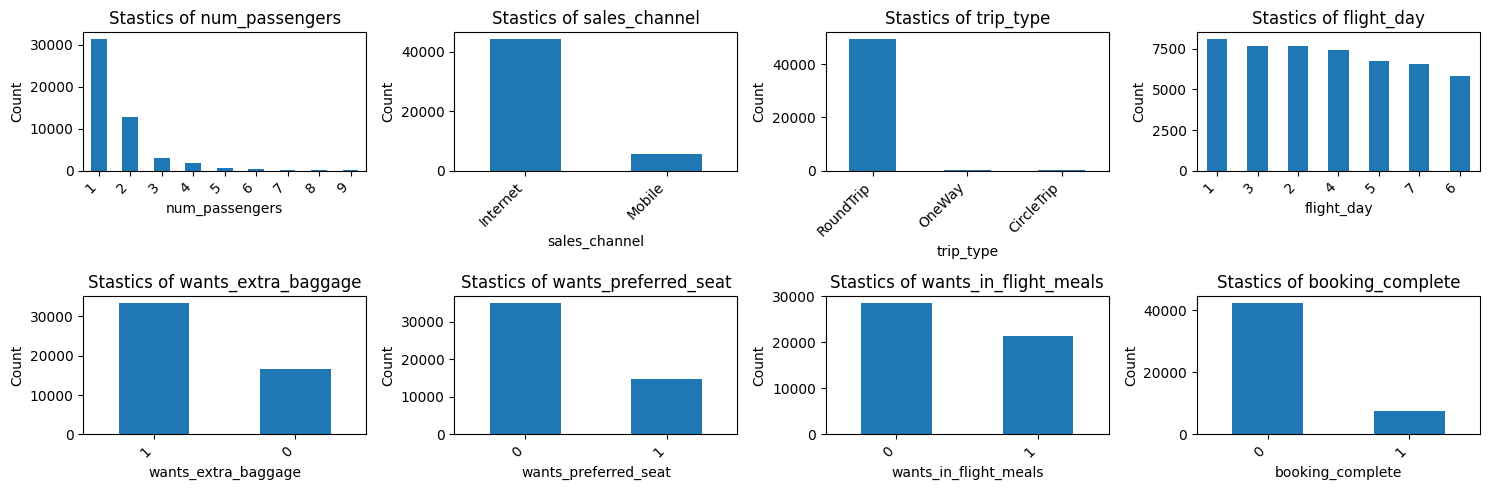

In [136]:
cols = ['num_passengers', 'sales_channel', 'trip_type', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']

fig, axes = plt.subplots(2, 4, figsize=(15, 5))  

for i, ax in enumerate(axes.flat):
    
    df[cols[i]].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(cols[i])
    ax.set_ylabel('Count')
    ax.set_title(f'Stastics of {cols[i]}')
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Encoding categorical columns into numerical values

In [61]:
## One-hot encoding of categorical columns

from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(data, features):
        
    for feature in features:
        feature_index = data.columns.get_loc(feature)

        one = OneHotEncoder(sparse=False)
        
        # Fit and transform the feature
        arr = one.fit_transform(data[[feature]])
        
        # Create a DataFrame with the one-hot encoded columns and appropriate column names
        df = pd.DataFrame(arr, columns=[f'{feature}_{category}' for category in one.categories_[0]])
        
        # Drop the original feature from the input data
        data.drop(columns=[feature], inplace=True)
        
        # Concatenate the input data and one-hot encoded DataFrame
        for col_name, col_data in df.items():
            data.insert(feature_index, col_name, col_data)
    
    return data


In [ ]:
## One-hot encoding is ineffective for columns with too many distinct categories

# df = one_hot_encoder(df,['sales_channel', 'trip_type', 'flight_day'])

In [234]:
def factorize_categorical(df):

    obj_cols = df.select_dtypes('object').columns
    df[obj_cols] = df[obj_cols].apply(lambda x: pd.factorize(x)[0])
    
    return df

### Normalizing Features

In [78]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scaler(data, features):
    
    subset = data[features].copy()

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(subset)
    scaled_data = pd.DataFrame(scaled, columns=features)

    data[features] = scaled_data

    return data

In [132]:
cols = list(df.select_dtypes(include=['float']).columns) + ['route', 'booking_origin']
df= min_max_scaler(df, cols)
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.125,0,0,0.302191,0.024422,0.304348,0,0.000000,0.000000,1,0,0,0.175983,0
1,0.000,0,0,0.129181,0.025707,0.130435,0,0.000000,0.000000,0,0,0,0.175983,0
2,0.125,0,0,0.280277,0.028278,0.739130,1,0.000000,0.009709,1,1,0,0.175983,0
3,0.000,0,0,0.110727,0.039846,0.173913,0,0.000000,0.000000,0,0,1,0.175983,0
4,0.125,0,0,0.078431,0.028278,0.652174,1,0.000000,0.009709,1,0,1,0.175983,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.125,0,0,0.031142,0.007712,0.391304,0,0.799499,0.349515,1,0,1,0.196687,0
49996,0.000,0,0,0.128028,0.007712,0.173913,4,0.799499,0.349515,0,0,0,0.196687,0
49997,0.000,0,0,0.027682,0.007712,0.956522,0,0.799499,0.349515,0,0,1,0.196687,0
49998,0.000,0,0,0.017301,0.007712,0.478261,3,0.799499,0.349515,1,0,1,0.196687,0


### Correlation Analysis

In [138]:
corr_df = df.corr(method='pearson', numeric_only=True)

<Axes: >

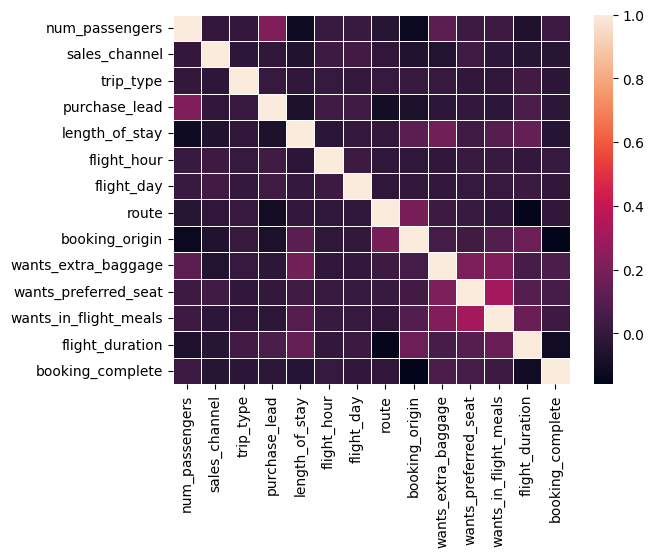

In [139]:
import seaborn as sns

sns.heatmap(corr_df, linewidths=0.5)

### Principal Component Analysis (PCA)

                            PC0       PC1       PC2       PC3       PC4
num_passengers        -0.000225  0.002384 -0.003039 -0.006136  0.000878
sales_channel         -0.000020 -0.000050 -0.000595 -0.000997  0.001218
trip_type              0.000010  0.000019 -0.000057  0.000090  0.000097
purchase_lead         -0.058085  0.997662  0.034775  0.008788 -0.001944
length_of_stay        -0.000424 -0.034146  0.996900 -0.070466  0.003506
flight_hour           -0.000468  0.002072 -0.003640 -0.002807  0.999984
flight_day            -0.000100  0.000230  0.000098 -0.000100 -0.000027
route                  0.998178  0.058211  0.001308 -0.015792  0.000306
booking_origin         0.016306 -0.010275  0.070014  0.997187  0.003094
wants_extra_baggage    0.000052 -0.000114  0.002454  0.000625 -0.000529
wants_preferred_seat   0.000029 -0.000017  0.000452  0.001047  0.001160
wants_in_flight_meals -0.000033 -0.000143  0.001455  0.002301  0.001531
flight_duration       -0.001120  0.000769  0.006723  0.016497 -0

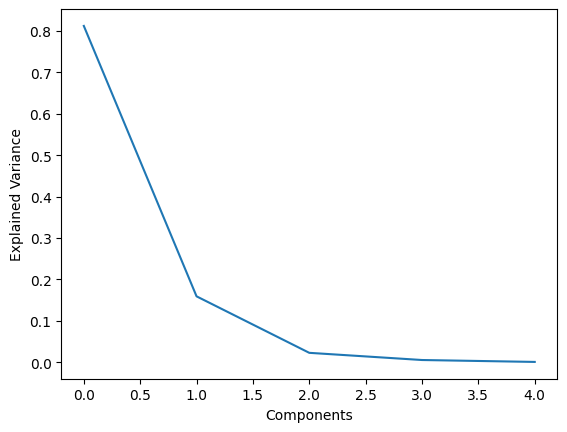

In [237]:
from sklearn.decomposition import PCA
import numpy as np

pca_df = df.copy()
pca_df = factorize_categorical(pca_df)
pca_df.drop('booking_complete', axis=1, inplace=True)

pca = PCA(n_components=5)
pca.fit(pca_df)

loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(5)], index=pca_df.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

Text(0, 0.5, 'Second Principal Component')

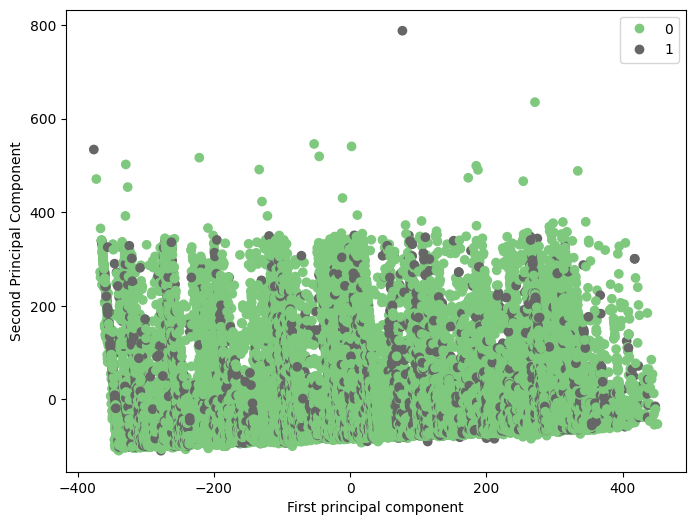

In [239]:
pcs = pca.transform(pca_df)
plt.figure(figsize=(8,6))
scatter = plt.scatter(pcs[:,0],pcs[:,1],c=df['booking_complete'], cmap='Accent')
labels = [0,1]
handles = [plt.Line2D([],[],marker="o", ls="", color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

<Axes: >

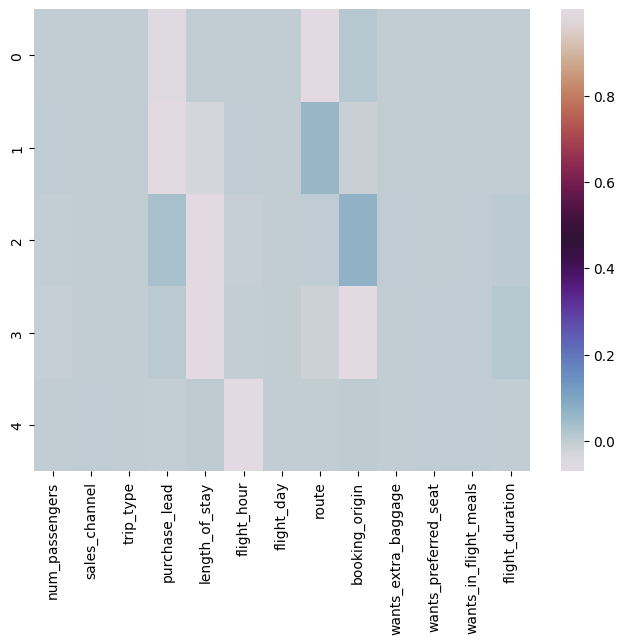

In [240]:
# correlation between features and principal components

map = pd.DataFrame(pca.components_, columns=pca_df.columns)
plt.figure(figsize=(8,6))
sns.heatmap(map,cmap='twilight')

### Feature Selection

In [185]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif


def feature_selection(data, method):

    df = data.copy()
    obj_cols = df.select_dtypes('object').columns
    df[obj_cols] = df[obj_cols].apply(lambda x: pd.factorize(x)[0])   

    features = df.drop('booking_complete', axis = 1)
    labels = df[df.columns[-1:]]

    fs = SelectKBest(score_func=method, k='all')
    fs.fit(features, labels)
    features = fs.transform(features)

    return fs.scores_


In [199]:
def plot_fs_scores(method,scores):

    feature_scores = [(df.columns[i], scores[i]) for i in range(len(scores))]
    feature_scores = sorted(feature_scores, key=lambda x: x[1])

    for i in range(len(scores)):
        print('Feature %s: %f' % (feature_scores[i][0], feature_scores[i][1]))

    plt.bar([feature for (feature,_) in feature_scores], [float(score) for (_,score) in feature_scores])
    plt.xticks(rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance Score')
    plt.title('{} feature selection'.format(str(method.__name__)))
    plt.show()

#### 1. Chi-Squared Feature Selection

Feature flight_day: 7.096858
Feature flight_hour: 8.207322
Feature num_passengers: 19.018876
Feature wants_in_flight_meals: 20.130962
Feature trip_type: 68.578106
Feature sales_channel: 74.823889
Feature wants_extra_baggage: 76.890347
Feature wants_preferred_seat: 88.288090
Feature flight_duration: 173.831731
Feature route: 250.314844
Feature purchase_lead: 2358.678338
Feature length_of_stay: 4480.964772
Feature booking_origin: 17902.548233


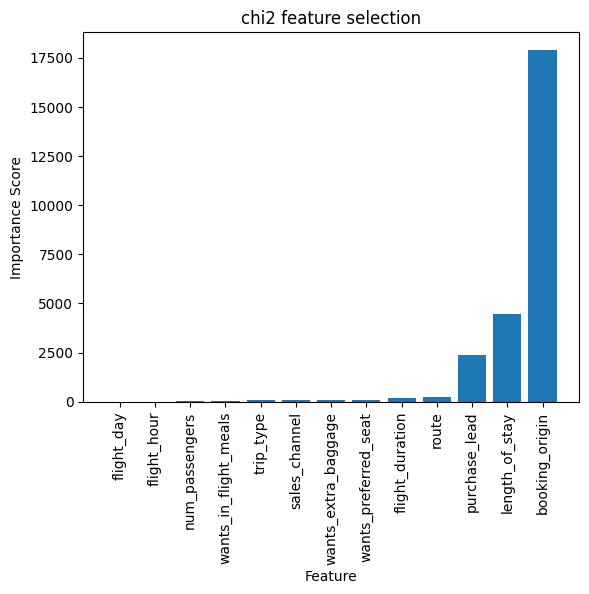

In [200]:
scores_chi2 = feature_selection(df, chi2)
plot_fs_scores(chi2,scores_chi2)

#### 2. Mutual Information Feature Selection

c:\Users\sonal\miniconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature sales_channel: 0.000000
Feature trip_type: 0.000000
Feature flight_day: 0.002311
Feature flight_hour: 0.002950
Feature purchase_lead: 0.003031
Feature wants_preferred_seat: 0.003302
Feature num_passengers: 0.003458
Feature wants_in_flight_meals: 0.005453
Feature length_of_stay: 0.009166
Feature wants_extra_baggage: 0.009481
Feature flight_duration: 0.020525
Feature booking_origin: 0.047437
Feature route: 0.054089


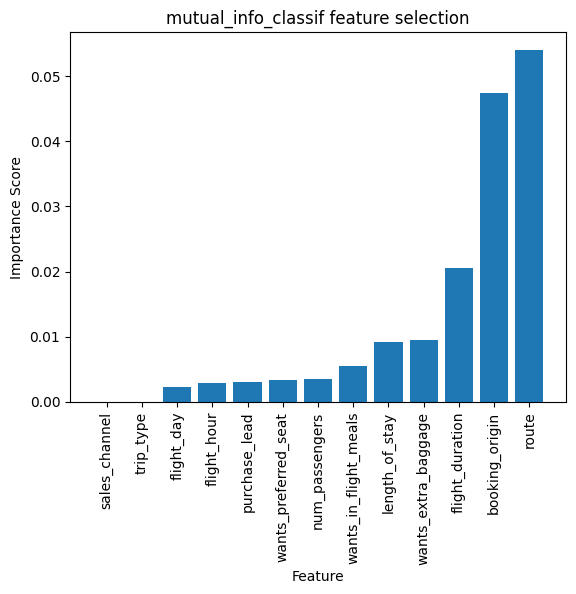

In [201]:
scores_mi = feature_selection(df, mutual_info_classif)
plot_fs_scores(mutual_info_classif,scores_mi)

In [209]:
## Thus, we can select the 12 features with the highest feature selection scores

selected_features = ['route', 'booking_origin', 'flight_duration', 'length_of_stay', 'wants_extra_baggage', 'wants_in_flight_meals', 'trip_type', 'flight_hour', 'sales_channel', 'purchase_lead', 'num_passengers', 'wants_preferred_seat']
features = df[selected_features]
labels = df[df.columns[-1:]]
features.head()

,route,booking_origin,flight_duration,length_of_stay,wants_extra_baggage,wants_in_flight_meals,trip_type,flight_hour,sales_channel,purchase_lead,num_passengers,wants_preferred_seat
0,AKLDEL,New Zealand,5.52,19,1,0,RoundTrip,7,Internet,262,2,0
1,AKLDEL,New Zealand,5.52,20,0,0,RoundTrip,3,Internet,112,1,0
2,AKLDEL,India,5.52,22,1,0,RoundTrip,17,Internet,243,2,1
3,AKLDEL,New Zealand,5.52,31,0,1,RoundTrip,4,Internet,96,1,0
4,AKLDEL,India,5.52,22,1,1,RoundTrip,15,Internet,68,2,0


### Splitting the data

In [202]:
from sklearn.model_selection import train_test_split

def split_data(features, labels):
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state = 0)

    return features_train, features_test, labels_train, labels_test

### Scaling and normalizing

In [205]:
from sklearn.preprocessing import MinMaxScaler

to_scale = ['flight_duration', 'length_of_stay', 'flight_hour', 'purchase_lead', 'num_passengers']

def scale_features(features):

  scaler = MinMaxScaler()
  scaler.fit(features[to_scale]) 
  features[to_scale] = scaler.transform(features[to_scale])
 
  return features

In [210]:
features = scale_features(features)
features

C:\Users\sonal\AppData\Local\Temp\ipykernel_20080\4100796384.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[to_scale] = scaler.transform(features[to_scale])


,route,booking_origin,flight_duration,length_of_stay,wants_extra_baggage,wants_in_flight_meals,trip_type,flight_hour,sales_channel,purchase_lead,num_passengers,wants_preferred_seat
0,AKLDEL,New Zealand,0.175983,0.024422,1,0,RoundTrip,0.304348,Internet,0.302191,0.125,0
1,AKLDEL,New Zealand,0.175983,0.025707,0,0,RoundTrip,0.130435,Internet,0.129181,0.000,0
2,AKLDEL,India,0.175983,0.028278,1,0,RoundTrip,0.739130,Internet,0.280277,0.125,1
3,AKLDEL,New Zealand,0.175983,0.039846,0,1,RoundTrip,0.173913,Internet,0.110727,0.000,0
4,AKLDEL,India,0.175983,0.028278,1,1,RoundTrip,0.652174,Internet,0.078431,0.125,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PERPNH,Australia,0.196687,0.007712,1,1,RoundTrip,0.391304,Internet,0.031142,0.125,0
49996,PERPNH,Australia,0.196687,0.007712,0,0,RoundTrip,0.173913,Internet,0.128028,0.000,0
49997,PERPNH,Australia,0.196687,0.007712,0,1,RoundTrip,0.956522,Internet,0.027682,0.000,0
49998,PERPNH,Australia,0.196687,0.007712,1,1,RoundTrip,0.478261,Internet,0.017301,0.000,0


In [211]:
to_encode = ['route', 'booking_origin', 'trip_type', 'sales_channel']

features = pd.get_dummies(features, columns=to_encode, dtype=float)
features

,flight_duration,length_of_stay,wants_extra_baggage,wants_in_flight_meals,flight_hour,purchase_lead,num_passengers,wants_preferred_seat,route_AKLDEL,route_AKLHGH,...,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,sales_channel_Internet,sales_channel_Mobile
0,0.175983,0.024422,1,0,0.304348,0.302191,0.125,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.175983,0.025707,0,0,0.130435,0.129181,0.000,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.175983,0.028278,1,0,0.739130,0.280277,0.125,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.175983,0.039846,0,1,0.173913,0.110727,0.000,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.175983,0.028278,1,1,0.652174,0.078431,0.125,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.196687,0.007712,1,1,0.391304,0.031142,0.125,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
49996,0.196687,0.007712,0,0,0.173913,0.128028,0.000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
49997,0.196687,0.007712,0,1,0.956522,0.027682,0.000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
49998,0.196687,0.007712,1,1,0.478261,0.017301,0.000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Calculate Evaluation Metrics

In [217]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def calculate_metrics(target, predicted):

    acc = accuracy_score(target, predicted)
    f1 = f1_score(target, predicted)
    pr = precision_score(target, predicted)
    re = recall_score(target, predicted)

    print('Accuracy score: {}'.format(acc))
    print('F1 score: {}'.format(f1))
    print('Precision score: {}'.format(pr))
    print('Recall score: {}'.format(re))

    return [acc, f1, pr, re]

#### 1. Random Forest Classifier

In [218]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_val,y_train,y_val = split_data(features, labels)

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_val)

forest_metrics = calculate_metrics(y_val, y_pred)


c:\Users\sonal\miniconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy score: 0.84704
F1 score: 0.2406671961874504
Precision score: 0.4840255591054313
Recall score: 0.1601479915433404


#### 2. Neural Network (MLP) Classifier

In [219]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

mlp_metrics = calculate_metrics(y_val, y_pred)

c:\Users\sonal\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.84864
F1 score: 0.0
Precision score: 0.0
Recall score: 0.0


c:\Users\sonal\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3. Decision Tree Classifier

In [220]:
from sklearn import tree

dectree = tree.DecisionTreeClassifier()
dectree = dectree.fit(X_train, y_train)
y_pred = dectree.predict(X_val)

tree_metrics = calculate_metrics(y_val, y_pred)

Accuracy score: 0.79032
F1 score: 0.2948614474038203
Precision score: 0.30027397260273975
Recall score: 0.28964059196617337


#### 4. Naive Bayes Classifier

In [221]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_val)

nb_metrics = calculate_metrics(y_val, y_pred)

c:\Users\sonal\miniconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.23696
F1 score: 0.27720521370112156
Precision score: 0.16180113234253363
Recall score: 0.9667019027484144


#### 5. Stochastic Gradient Descent Classifier

In [222]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=50)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_val)

sgd_metrics = calculate_metrics(y_val, y_pred)

c:\Users\sonal\miniconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.84872
F1 score: 0.005260389268805892
Precision score: 0.5555555555555556
Recall score: 0.002642706131078224


In [227]:
metrics_df = pd.DataFrame([['Random Forest']+forest_metrics, ['MLP']+mlp_metrics, ['Decision Tree']+tree_metrics, ['Naive Bayes']+nb_metrics, ['SGD']+sgd_metrics], columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
metrics_df

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.84704,0.240667,0.484026,0.160148
1,MLP,0.84864,0.000000,0.000000,0.000000
2,Decision Tree,0.79032,0.294861,0.300274,0.289641
3,Naive Bayes,0.23696,0.277205,0.161801,0.966702
4,SGD,0.84872,0.005260,0.555556,0.002643


<Axes: title={'center': 'Models and their metrics scores'}, xlabel='Model'>

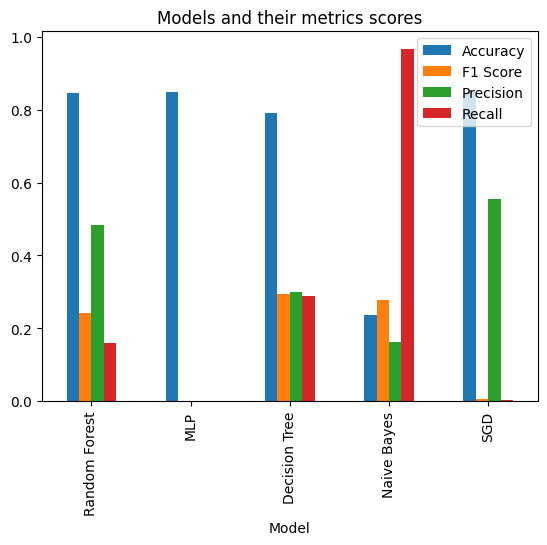

In [231]:
metrics_df.plot(x='Model',
        kind='bar',
        stacked=False,
        title='Models and their metrics scores')